In [1]:
import pandas, numpy, seaborn, umap
import scipy, scipy.signal
import sklearn, sklearn.cluster
import MulticoreTSNE

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.family':'sans-serif',
                            'font.size':20, 
                            'xtick.labelsize':30, 
                            'ytick.labelsize':30, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':40})

# user-defined variables

In [3]:
expression_file = '/home/adrian/databases/gtex/zscore.tsv'
output_dir = '/home/adrian/scratch/'

In [4]:
iso1 = 'ENST00000354449.7'
iso2 = 'ENST00000354956.9'

# read data

In [5]:
%%time
zscore_df = pandas.read_csv(expression_file, index_col=0, sep='\t')
print(zscore_df.shape)
zscore_df.head()

(46490, 4385)
CPU times: user 29.9 s, sys: 846 ms, total: 30.8 s
Wall time: 30.8 s


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-X88G-0426-SM-47JZ5,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-WHPG-0226-SM-3NMB9,GTEX-P44H-0526-SM-2XCF1,GTEX-11ONC-2326-SM-5HL6P,...,GTEX-144GO-0126-SM-5LUAO,GTEX-1313W-1626-SM-5J1OE,GTEX-12ZZY-1526-SM-5LZWF,GTEX-QMRM-0826-SM-3NB33,GTEX-OOBK-2626-SM-2HMKY,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENST00000625998.2,0.201517,0.036483,-2.678424,-1.913425,-0.196345,-1.555508,0.632833,-2.103236,0.078840,-0.065244,...,-1.851241,-0.028877,0.104782,-1.695963,-0.742029,-0.091520,0.168139,-1.158666,1.260004,-0.326773
ENST00000583693.5,-0.157536,-0.387785,0.348795,0.398806,-1.129253,0.687884,0.582988,0.557330,-1.350953,-1.209634,...,-0.173132,-1.156789,-0.024576,0.025022,0.682437,-0.352807,2.375209,-0.067561,2.293898,-0.429855
ENST00000012134.6,-1.858374,-0.230357,-1.101552,-1.678630,0.351186,-0.498028,0.051742,0.196520,-0.976582,0.499852,...,-0.537618,-0.037223,0.879018,-1.132267,0.183165,-0.377856,-0.203226,-0.120816,1.457736,-0.879079
ENST00000403263.5,1.824639,0.803760,-0.939061,-0.804629,-0.097733,-0.456441,2.261055,0.277584,2.031893,-0.600251,...,-0.607003,-0.588132,0.423970,0.384197,-1.341820,0.128895,-0.985785,0.765705,0.074665,-1.675408
ENST00000449352.6,-0.714858,0.391161,-0.649496,-0.251540,0.275481,-0.622791,0.703996,-0.210234,-1.321825,0.461139,...,1.286650,-1.422651,0.540561,-0.532098,-1.155870,-1.024148,0.439395,-0.473859,-1.347097,-2.987846


In [6]:
print(zscore_df.max().max())
print(zscore_df.min().min())

15.804689630376652
-18.18179087330121


# exploratory visualization

## heatmap

In [7]:
zscore_df.rename_axis('Transcripts', inplace=True)
zscore_df.rename_axis('Samples', axis='columns', inplace=True)
print(zscore_df.shape)
zscore_df

(46490, 4385)


Samples,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-X88G-0426-SM-47JZ5,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-WHPG-0226-SM-3NMB9,GTEX-P44H-0526-SM-2XCF1,GTEX-11ONC-2326-SM-5HL6P,...,GTEX-144GO-0126-SM-5LUAO,GTEX-1313W-1626-SM-5J1OE,GTEX-12ZZY-1526-SM-5LZWF,GTEX-QMRM-0826-SM-3NB33,GTEX-OOBK-2626-SM-2HMKY,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
Transcripts,,,,,,,,,,,,,,,,,,,,,
ENST00000625998.2,0.201517,0.036483,-2.678424,-1.913425,-0.196345,-1.555508,0.632833,-2.103236,0.078840,-0.065244,...,-1.851241,-0.028877,0.104782,-1.695963,-0.742029,-0.091520,0.168139,-1.158666,1.260004,-0.326773
ENST00000583693.5,-0.157536,-0.387785,0.348795,0.398806,-1.129253,0.687884,0.582988,0.557330,-1.350953,-1.209634,...,-0.173132,-1.156789,-0.024576,0.025022,0.682437,-0.352807,2.375209,-0.067561,2.293898,-0.429855
ENST00000012134.6,-1.858374,-0.230357,-1.101552,-1.678630,0.351186,-0.498028,0.051742,0.196520,-0.976582,0.499852,...,-0.537618,-0.037223,0.879018,-1.132267,0.183165,-0.377856,-0.203226,-0.120816,1.457736,-0.879079
ENST00000403263.5,1.824639,0.803760,-0.939061,-0.804629,-0.097733,-0.456441,2.261055,0.277584,2.031893,-0.600251,...,-0.607003,-0.588132,0.423970,0.384197,-1.341820,0.128895,-0.985785,0.765705,0.074665,-1.675408
ENST00000449352.6,-0.714858,0.391161,-0.649496,-0.251540,0.275481,-0.622791,0.703996,-0.210234,-1.321825,0.461139,...,1.286650,-1.422651,0.540561,-0.532098,-1.155870,-1.024148,0.439395,-0.473859,-1.347097,-2.987846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENST00000470412.5,-0.343926,-0.700203,1.493895,-0.896921,-0.323228,1.640890,0.597571,-0.869830,0.848136,0.116067,...,-0.357460,-0.206770,-1.171861,1.835204,-0.954903,0.083981,-1.160399,0.784913,-0.591934,2.417448
ENST00000469534.1,-0.658335,-0.508709,-1.181746,-1.279740,-0.498626,-0.508271,0.492896,-0.938374,3.573323,1.974929,...,0.091804,1.200977,-0.295721,-0.439505,-1.144647,0.641427,-0.829288,1.896179,-1.635945,-1.402662
ENST00000507412.1,1.256783,1.699418,-0.896584,-0.779208,1.566538,-0.102175,-1.142376,-0.776279,0.097170,-0.791390,...,-0.567447,-0.741137,-0.738446,0.601353,-0.462320,0.090812,0.350678,0.463214,0.326356,2.009768


In [8]:
# reduction of 10 runs for 68 CPU s
# reduction of 3 runs for 7 CPU min
# reduction of 1 runs for xx CPM min

print(zscore_df.shape)

reduction = 1
test = zscore_df.iloc[:int(zscore_df.shape[0]/reduction), :] 

print(test.shape)
test.tail()

(46490, 4385)
(46490, 4385)


Samples,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-X88G-0426-SM-47JZ5,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-WHPG-0226-SM-3NMB9,GTEX-P44H-0526-SM-2XCF1,GTEX-11ONC-2326-SM-5HL6P,...,GTEX-144GO-0126-SM-5LUAO,GTEX-1313W-1626-SM-5J1OE,GTEX-12ZZY-1526-SM-5LZWF,GTEX-QMRM-0826-SM-3NB33,GTEX-OOBK-2626-SM-2HMKY,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
Transcripts,,,,,,,,,,,,,,,,,,,,,
ENST00000470412.5,-0.343926,-0.700203,1.493895,-0.896921,-0.323228,1.640890,0.597571,-0.869830,0.848136,0.116067,...,-0.357460,-0.206770,-1.171861,1.835204,-0.954903,0.083981,-1.160399,0.784913,-0.591934,2.417448
ENST00000469534.1,-0.658335,-0.508709,-1.181746,-1.279740,-0.498626,-0.508271,0.492896,-0.938374,3.573323,1.974929,...,0.091804,1.200977,-0.295721,-0.439505,-1.144647,0.641427,-0.829288,1.896179,-1.635945,-1.402662
ENST00000507412.1,1.256783,1.699418,-0.896584,-0.779208,1.566538,-0.102175,-1.142376,-0.776279,0.097170,-0.791390,...,-0.567447,-0.741137,-0.738446,0.601353,-0.462320,0.090812,0.350678,0.463214,0.326356,2.009768
ENST00000568351.1,-1.172953,0.246373,0.766133,0.853352,-0.234204,0.774586,0.211088,1.161617,-1.372284,-0.044015,...,1.313564,-0.194610,0.288484,0.332878,1.186967,0.236284,-0.949662,-0.896561,-0.750159,-0.302144
ENST00000491408.1,-0.713929,0.883018,-0.625723,-0.343984,-0.327609,-0.707473,0.368435,0.039041,1.781173,2.079301,...,0.740145,-0.105044,-0.420568,0.042424,-0.398806,0.550752,0.069222,0.863807,-2.074857,-0.859024


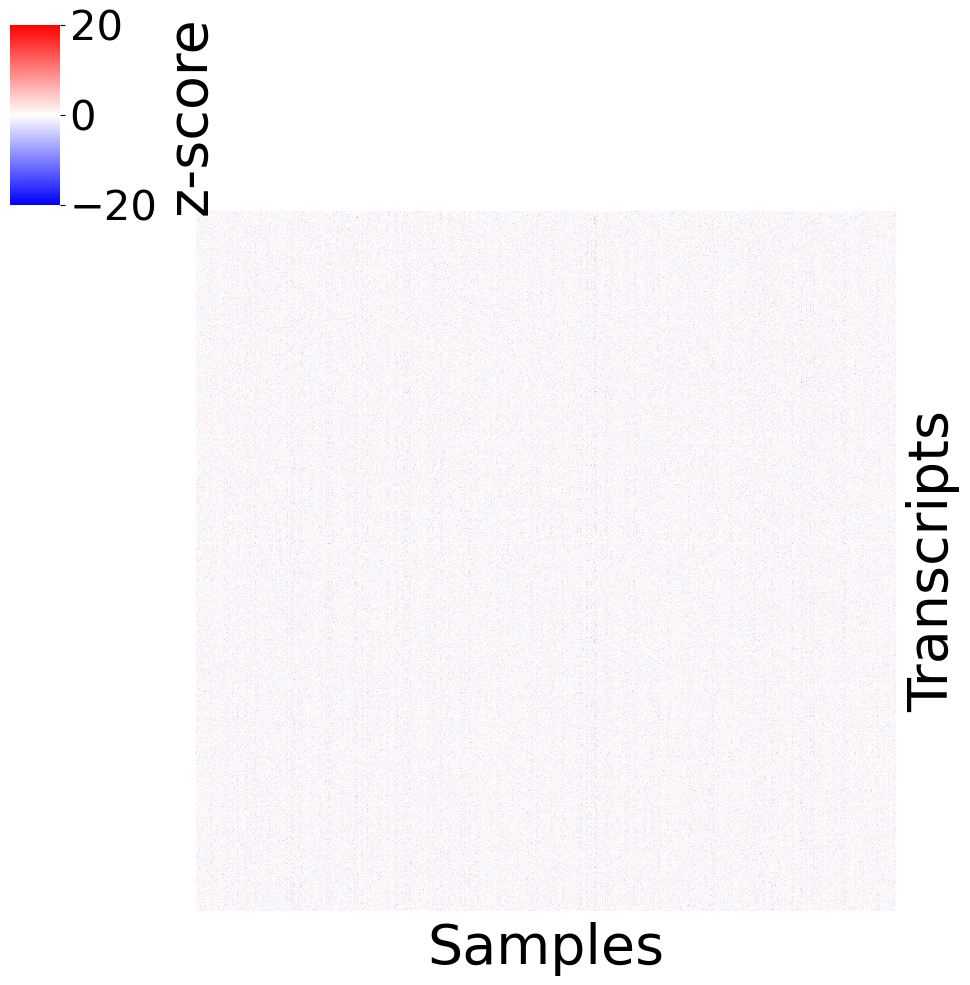

CPU times: user 1min 32s, sys: 3.72 s, total: 1min 36s
Wall time: 1min 36s


In [10]:
%%time
seaborn.clustermap(test, 
                   cmap='bwr', 
                   row_cluster=False, 
                   col_cluster=False, 
                   vmin=-20, vmax=20, 
                   cbar_kws={'label':'z-score'},
                   xticklabels=False, yticklabels=False, 
                  )
matplotlib.pyplot.show()

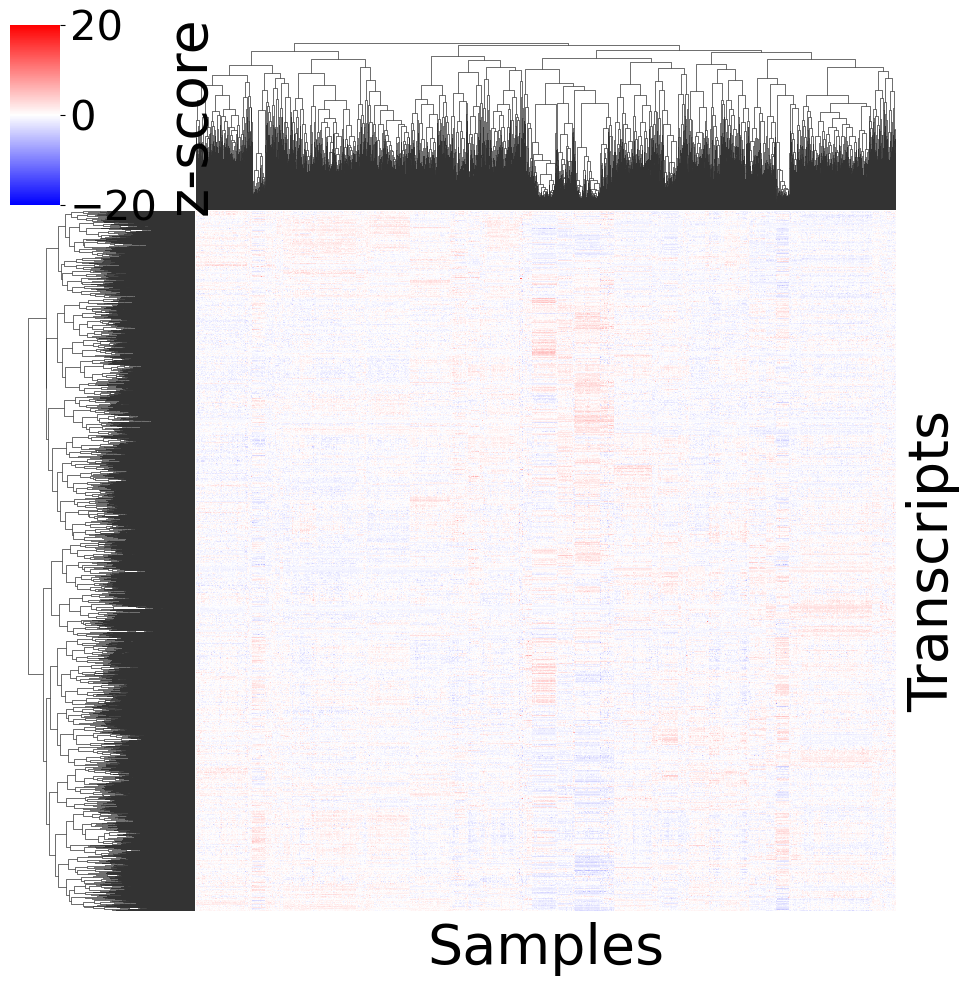

CPU times: user 51min 44s, sys: 9.96 s, total: 51min 54s
Wall time: 51min 54s


In [11]:
%%time
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.clustermap(test, 
                   cmap='bwr', 
                   row_cluster=True, 
                   col_cluster=True, 
                   vmin=-20, vmax=20, 
                   cbar_kws={'label':'z-score'},
                   xticklabels=False, yticklabels=False, 
                   method=linkage_method, metric=distance_metric
                  )
matplotlib.pyplot.show()

## dimensionality reduction

### UMAP

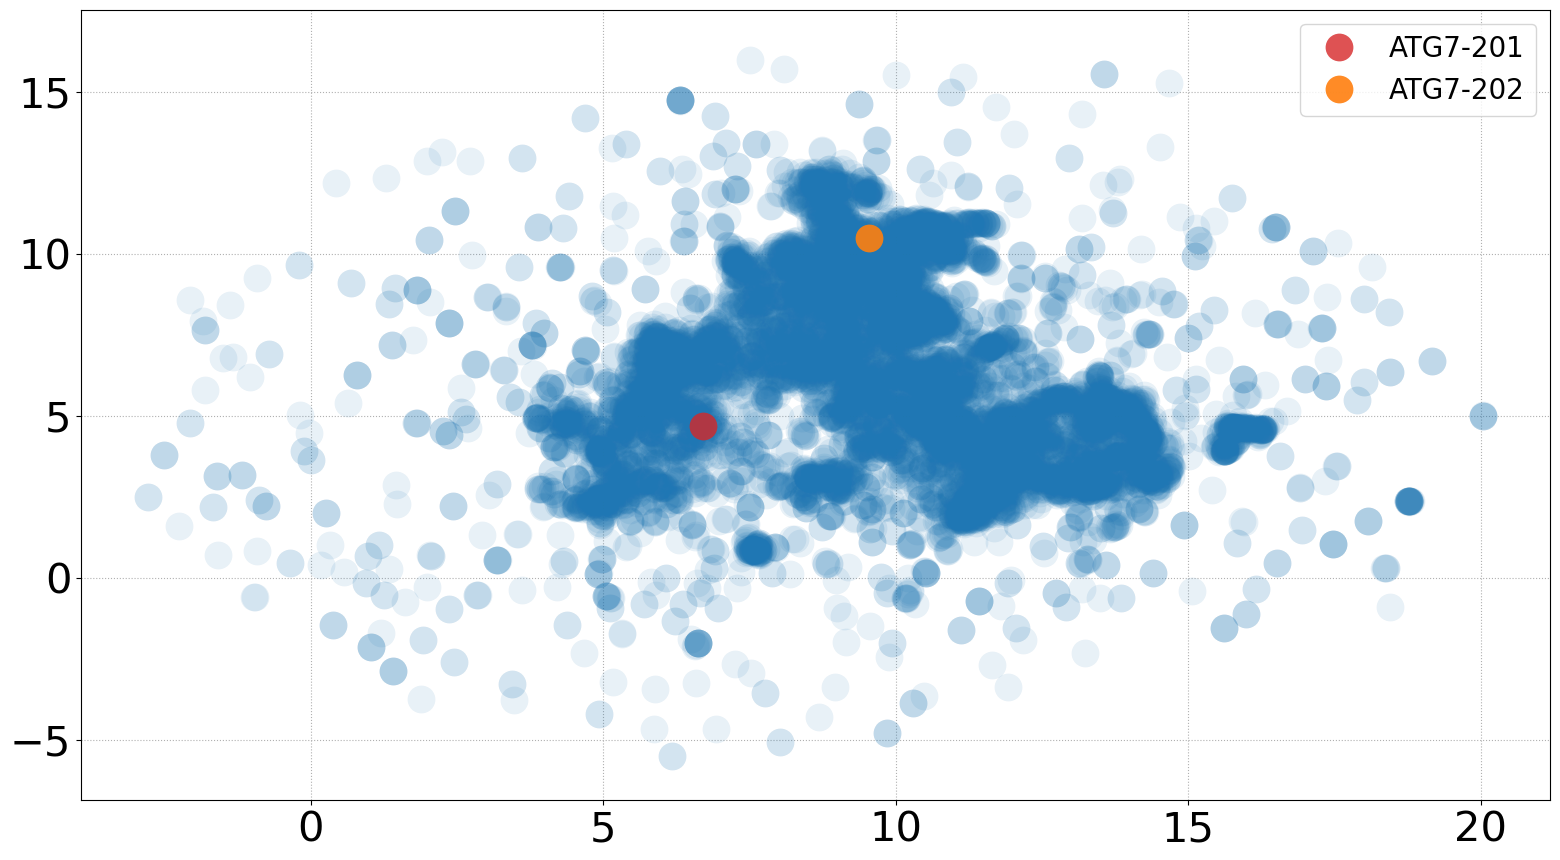

(46490, 2)
CPU times: user 3min 59s, sys: 2.68 s, total: 4min 2s
Wall time: 29.6 s


,X,Y
Transcripts,,
ENST00000625998.2,13.699735,3.771705
ENST00000583693.5,12.229038,3.752594
ENST00000012134.6,7.768353,5.866795
ENST00000403263.5,14.179228,5.049126
ENST00000449352.6,10.207657,9.189502
...,...,...
ENST00000470412.5,18.064171,1.769330
ENST00000469534.1,9.739155,2.222368
ENST00000507412.1,4.671200,2.164609


In [12]:
%%time
runUmap = umap.UMAP(metric='correlation',
                    n_neighbors=5,
                    min_dist=0,
                    learning_rate=0.5
                   ).fit_transform
dr_umap = runUmap(test)
positionsu = pandas.DataFrame(dr_umap, columns=['X', 'Y'], index=test.index)

matplotlib.pyplot.plot(positionsu['X'], positionsu['Y'], 'o', alpha=1/10, markeredgecolor='None', ms=20, markevery=5)

matplotlib.pyplot.plot(positionsu.loc[iso1, 'X'], positionsu.loc[iso1, 'Y'], 'o', alpha=0.8, markeredgecolor='None', ms=20, color='tab:red', label='ATG7-201')
matplotlib.pyplot.plot(positionsu.loc[iso2, 'X'], positionsu.loc[iso2, 'Y'], 'o', alpha=0.9, markeredgecolor='None', ms=20, color='tab:orange', label='ATG7-202')

matplotlib.pyplot.legend()
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

print(positionsu.shape)
positionsu

### tSNE

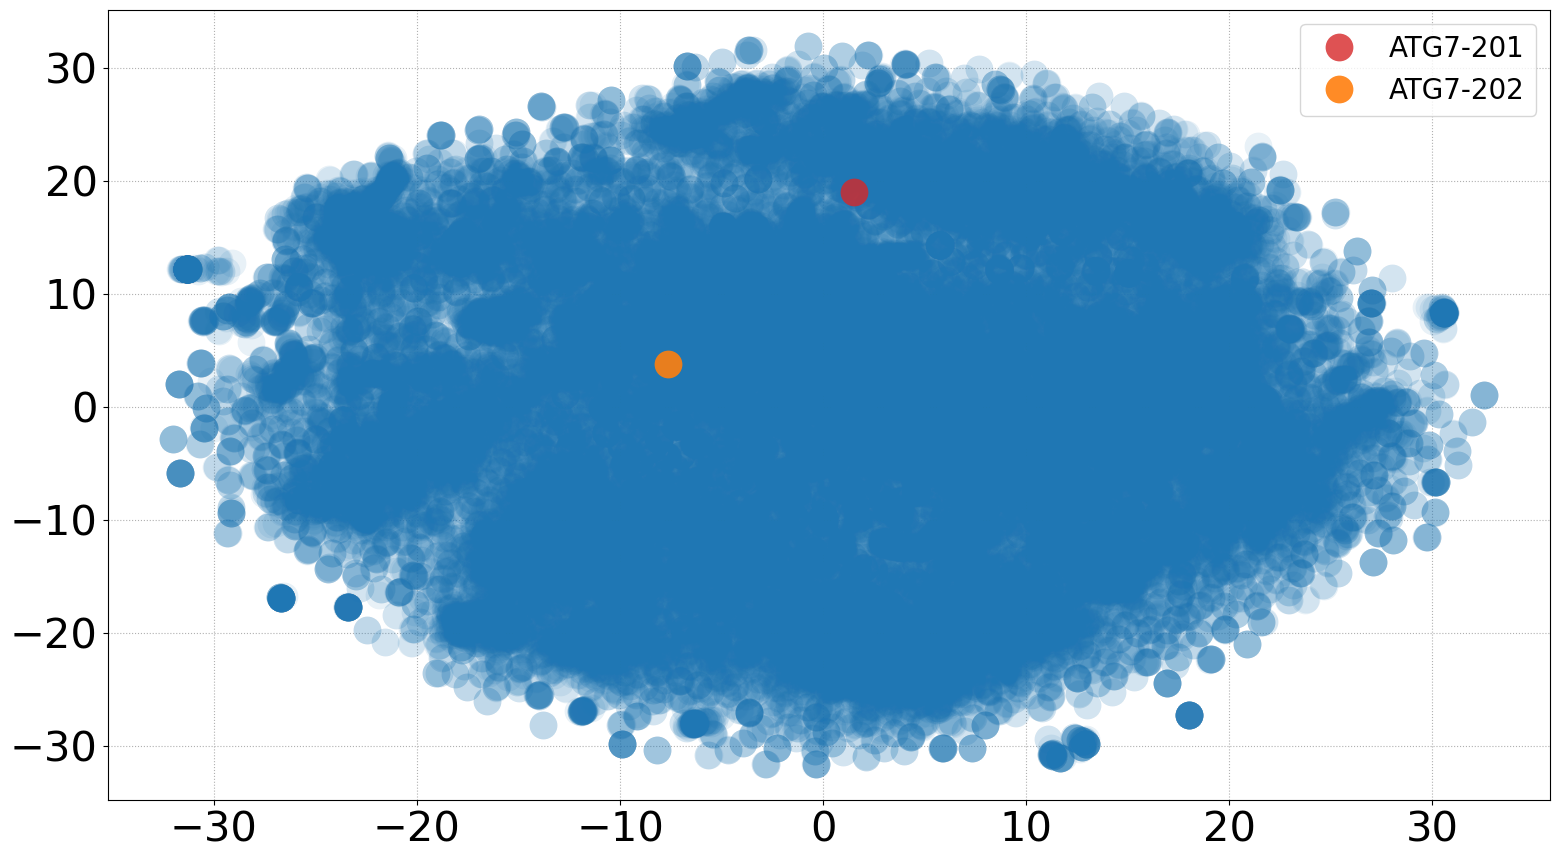

CPU times: user 8h 56min 25s, sys: 31min 50s, total: 9h 28min 15s
Wall time: 30min 49s


In [13]:
%%time
tsne = MulticoreTSNE.MulticoreTSNE(n_jobs=20)
dr_tsne = tsne.fit_transform(test)
positionst = pandas.DataFrame(dr_tsne, columns=['X', 'Y'], index=test.index)

matplotlib.pyplot.plot(positionst['X'], positionst['Y'], 'o', alpha=1/10, markeredgecolor='None', ms=20)

matplotlib.pyplot.plot(positionst.loc[iso1, 'X'], positionst.loc[iso1, 'Y'], 'o', alpha=0.8, markeredgecolor='None', ms=20, color='tab:red', label='ATG7-201')
matplotlib.pyplot.plot(positionst.loc[iso2, 'X'], positionst.loc[iso2, 'Y'], 'o', alpha=0.9, markeredgecolor='None', ms=20, color='tab:orange', label='ATG7-202')

matplotlib.pyplot.legend()
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

## heatmap with labels

In [14]:
print(test.index.get_loc(iso1))
print(test.index.get_loc(iso2))

25128
18310


In [15]:
observed_best_k = 4
best_index = all_ks.index(observed_best_k)
labels = groupings[best_index]

print(set(labels))

print('ATG7-201 is in cluster {}'.format(labels[test.index.get_loc(iso1)]))
print('ATG7-202 is in cluster {}'.format(labels[test.index.get_loc(iso2)]))

NameError: name 'all_ks' is not defined

In [ ]:
%%time

cmap = matplotlib.pyplot.cm.get_cmap('tab20')
k_colors = cmap(labels)

linkage_method = 'complete'
distance_metric = 'correlation'

clustergrid = seaborn.clustermap(test, 
                   cmap='bwr', 
                   row_cluster=True, 
                   col_cluster=True, 
                   vmin=-20, vmax=20, 
                   cbar_kws={'label':'z-score'},
                   xticklabels=False, yticklabels=False, 
                   method=linkage_method, metric=distance_metric,
                   row_colors=k_colors
                  )

# adding where isoforms fall
loc1 = clustergrid.dendrogram_row.reordered_ind.index(test.index.get_loc(iso1))
loc2 = clustergrid.dendrogram_row.reordered_ind.index(test.index.get_loc(iso2))
ax = clustergrid.ax_heatmap
ax.add_patch(matplotlib.patches.Arrow(test.shape[1], loc1, dx=-100, dy=0, color='gold', width=100))
ax.add_patch(matplotlib.patches.Arrow(test.shape[1], loc2, dx=-100, dy=0, color='skyblue', width=100))
matplotlib.pyplot.show()

In [ ]:
iso1clusterlabel = labels[test.index.get_loc(iso1)]
iso2clusterlabel = labels[test.index.get_loc(iso2)]
print(iso1clusterlabel, iso2clusterlabel)

In [ ]:
# only the two isoforms
print(iso1)
print(iso2)
seaborn.set(font_scale=1) 
seaborn.clustermap(
    test.iloc[[test.index.get_loc(iso1), test.index.get_loc(iso2)], clustergrid.dendrogram_col.reordered_ind], 
    cmap='bwr', 
    vmin=-20, vmax=20,
    row_cluster=False, col_cluster=False, 
    cbar_kws={'label':'z-score'},
    xticklabels=False, yticklabels=True,  
    row_colors=cmap([iso1clusterlabel, iso2clusterlabel])
)
matplotlib.pyplot.show()

In [ ]:
# only the two clusters
cluster_indexes = []
cluster_labels = []
iso1_cluster_names = []; iso2_cluster_names = []
for row in clustergrid.dendrogram_row.reordered_ind:
    if labels[row] == iso1clusterlabel:
        cluster_indexes.append(row); cluster_labels.append(iso1clusterlabel)
        iso1_cluster_names.append(test.index[row])
    if labels[row] == iso2clusterlabel:
        cluster_indexes.append(row); cluster_labels.append(iso2clusterlabel)
        iso2_cluster_names.append(test.index[row])

seaborn.clustermap(
    test.iloc[cluster_indexes, clustergrid.dendrogram_col.reordered_ind], 
    cmap='bwr', 
    vmin=-20, vmax=20,
    row_cluster=False, col_cluster=False, 
    cbar_kws={'label':'z-score'},
    xticklabels=False, yticklabels=False,  
    row_colors=cmap(cluster_labels)
)
matplotlib.pyplot.show()

print(len(iso1_cluster_names), len(iso2_cluster_names))
print(iso1 in iso1_cluster_names, iso1 in iso2_cluster_names)
print(iso2 in iso2_cluster_names, iso2 in iso1_cluster_names)

In [ ]:
linkage_method = 'complete'
distance_metric = 'correlation'

twoc = test.iloc[cluster_indexes, clustergrid.dendrogram_col.reordered_ind]

clustergrid = seaborn.clustermap(
    twoc, 
    cmap='bwr', 
    row_cluster=True, 
    col_cluster=False, 
    vmin=-20, vmax=20, 
    cbar_kws={'label':'z-score'},
    xticklabels=False, yticklabels=False, 
    method=linkage_method, metric=distance_metric,
    row_colors=cmap(cluster_labels)
)

# adding where isoforms fall
loc1 = clustergrid.dendrogram_row.reordered_ind.index(twoc.index.get_loc(iso1))
loc2 = clustergrid.dendrogram_row.reordered_ind.index(twoc.index.get_loc(iso2))
ax = clustergrid.ax_heatmap
ax.add_patch(matplotlib.patches.Arrow(twoc.shape[1], loc1, dx=-100, dy=0, color='gold', width=100))
ax.add_patch(matplotlib.patches.Arrow(twoc.shape[1], loc2, dx=-100, dy=0, color='skyblue', width=100))
matplotlib.pyplot.show()